---
Fuzzy MAMDANI
---

In [1]:
# Mengimpor Library 
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
# Menentukan Variabel Kasus
#Letak Geografis Tanah
Letak = np.arange(0, 120, 1)

#Luas Tanah
Luas = np.arange(0, 120, 1)

#Akses Sumber Air
Akses = np.arange(0, 110, 1)

#Harga Jual
Harga = np.arange(0, 350, 1)

In [3]:
# Menentukan Range Himpunan Fuzzy

#Letak Geografis Tanah
Letak_tidakstrategis = fuzz.trapmf(Letak, [0, 0, 50, 70])
Letak_strategis = fuzz.trapmf(Letak,[50, 70, 120, 120])

#Luas Tanah
Luas_sempit = fuzz.trapmf(Luas, [0, 0, 40, 80])
Luas_lapang = fuzz.trapmf(Luas, [40, 80, 120, 120])

#Akses Sumber Air
Akses_susah = fuzz.trapmf(Akses, [0, 0, 40, 70])
Akses_mudah = fuzz.trapmf (Akses, [40, 70, 110, 110])

#Harga Jual
Harga_rendah = fuzz.trapmf (Harga, [0, 0, 50, 300])
Harga_tinggi = fuzz.trapmf (Harga, [50, 300, 350, 350])

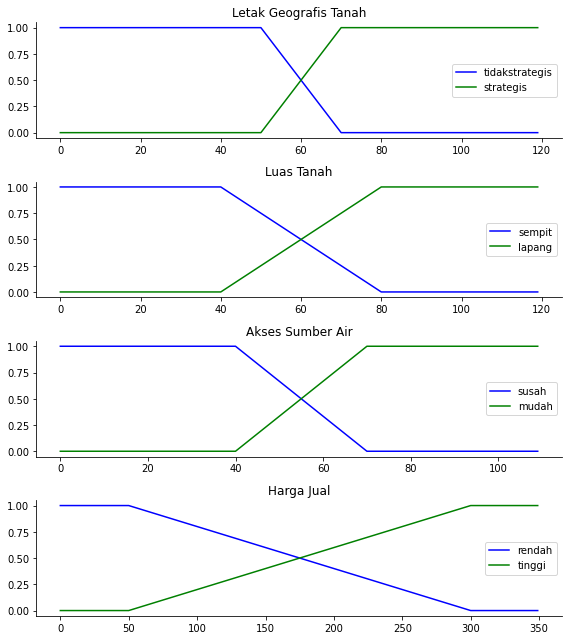

In [4]:
# Membuat Grafik Himpunan Fuzzy
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8,9))

ax0.plot(Letak, Letak_tidakstrategis, 'b', linewidth=1.5, label='tidakstrategis')
ax0.plot(Letak, Letak_strategis, 'g', linewidth=1.5, label='strategis')

ax0.set_title('Letak Geografis Tanah')
ax0.legend()

ax1.plot(Luas, Luas_sempit, 'b', linewidth=1.5, label='sempit')
ax1.plot(Luas, Luas_lapang, 'g', linewidth=1.5, label='lapang')

ax1.set_title('Luas Tanah')
ax1.legend()

ax2.plot(Akses, Akses_susah, 'b', linewidth=1.5, label='susah')
ax2.plot(Akses, Akses_mudah, 'g', linewidth=1.5, label='mudah')

ax2.set_title('Akses Sumber Air')
ax2.legend()

ax3.plot(Harga, Harga_rendah, 'b', linewidth=1.5, label='rendah')
ax3.plot(Harga, Harga_tinggi, 'g', linewidth=1.5, label='tinggi')

ax3.set_title('Harga Jual')
ax3.legend()

for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()

In [26]:
# Mengimput Nilai Kasus
LGT = 68
LT = 58
ASA = 62

In [27]:
# Menentukan Rule Base
"""
•R1, Jika Letak Geografis tidak strategis, Luas Tanah sempit AND Akses Sumber Air susah maka Harga Jual rendah
•R2, Jika Letak Geografis tidak strategis, Luas Tanah sempit AND Akses Sumber Air mudah maka Harga Jual rendah
•R3, Jika Letak Geografis tidak strategis, Luas Tanah lapang AND Akses Sumber Air susah maka Harga Jual rendah
•R4, Jika Letak Geografis tidak strategis, Luas Tanah lapang AND Akses Sumber Air mudah maka Harga Jual tinggi
•R5, Jika Letak Geografis strategis, Luas Tanah sempit AND Akses Sumber Air susah maka Harga Jual rendah
•R6, Jika Letak Geografis strategis, Luas Tanah sempit AND Akses Sumber Air mudah maka Harga Jual tinggi
•R7, Jika Letak Geografis strategis, Luas Tanah lapang AND Akses Sumber Air susah maka Harga Jual tinggi
•R8, Jika Letak Geografis strategis, Luas Tanah lapang AND Akses Sumber Air mudah maka Harga Jual tinggi

Domain Harga Jual:
RENDAH --> (300-Z)/(300-50) = fmin; apred[i] = fmin; (300 - Z) = 250 * apred[i]; Z = 300 - (250 * apred[i])
TINGGI --> (Z-50)/(300-50) = fmin; apred[i] = fmin; (Z - 50) = 250 * apred[i]; Z = (250 * apred[i]) + 50
""";

In [28]:
# Menentukan Derajat Keanggotaan
a = []
a.append(fuzz.interp_membership(Letak, Letak_tidakstrategis, LGT))
a.append(fuzz.interp_membership(Letak, Letak_strategis, LGT))

b = []
b.append(fuzz.interp_membership(Luas, Luas_sempit, LT))
b.append(fuzz.interp_membership(Luas, Luas_lapang, LT))

c = []
c.append(fuzz.interp_membership(Akses, Akses_susah, ASA))
c.append(fuzz.interp_membership(Akses, Akses_mudah, ASA))

print("Derajat Keanggotaan Letak Geografis Tanah")
if a[0] > 0:
    print("tidakstrategis: "+str(a[0]))
if a[1] > 0:
    print("strategis: "+str(a[1]))

print("Derajat Keanggotaan Luas Tanah")
if b[0] > 0:
    print("sempit: "+str(b[0]))
if b[1] > 0:
    print("lapang: "+str(b[1]))

print("Derajat Keanggotaan Akses Sumber Air")
if c[0] > 0:
    print("susah: "+str(c[0]))
if c[1] > 0:
    print("mudah: "+str(c[1]))

Derajat Keanggotaan Letak Geografis Tanah
tidakstrategis: 0.1
strategis: 0.9
Derajat Keanggotaan Luas Tanah
sempit: 0.55
lapang: 0.45
Derajat Keanggotaan Akses Sumber Air
susah: 0.26666666666666666
mudah: 0.7333333333333333


---
Memodelkan Rule Base dan Inferensi MAMDANI
---

•R1, Jika Letak Geografis tidak strategis, Luas Tanah sempit AND Akses Sumber Air susah maka Harga Jual rendah •R2, Jika Letak Geografis tidak strategis, Luas Tanah sempit AND Akses Sumber Air mudah maka Harga Jual rendah •R3, Jika Letak Geografis tidak strategis, Luas Tanah lapang AND Akses Sumber Air susah maka Harga Jual rendah •R4, Jika Letak Geografis tidak strategis, Luas Tanah lapang AND Akses Sumber Air mudah maka Harga Jual tinggi •R5, Jika Letak Geografis strategis, Luas Tanah sempit AND Akses Sumber Air susah maka Harga Jual rendah •R6, Jika Letak Geografis strategis, Luas Tanah sempit AND Akses Sumber Air mudah maka Harga Jual tinggi •R7, Jika Letak Geografis strategis, Luas Tanah lapang AND Akses Sumber Air susah maka Harga Jual tinggi •R8, Jika Letak Geografis strategis, Luas Tanah lapang AND Akses Sumber Air mudah maka Harga Jual tinggi

Domain Harga Jual: RENDAH --> (300-Z)/(300-50) = fmin; apred[i] = fmin; (300 - Z) = 250 * apred[i]; Z = 300 - (250 * apred[i]) TINGGI --> (Z-50)/(300-50) = fmin; apred[i] = fmin; (Z - 50) = 250 * apred[i]; Z = (250 * apred[i]) + 50

In [29]:
# Memodelkan Rule Base dan Inferensi Mamdani

x1 = np.fmin(a[0], b[0])
apred1 = np.fmin(x1, c[0])
print("Rendah, Nilai apred1 = ", apred1)
z1 = 300 - (250 * apred1)
print("Nilai z1 = ", z1)

x2 = np.fmin(a[0], b[0])
apred2 = np.fmin(x2, c[1])
print("Rendah, Nilai apred2 = ", apred2)
z2 = 300 - (250 * apred2)
print("Nilai z2 = ", z2)

x3 = np.fmin(a[0], b[1])
apred3 = np.fmin(x3, c[0])
print("Rendah, Nilai apred3 = ", apred3)
z3 = 300 - (250 * apred3)
print("Nilai z3 = ", z3)

x4 = np.fmin(a[0], b[1])
apred4 = np.fmin(x4, c[1])
print("Tinggi, Nilai apred4 = ", apred4)
z4 = (250 * apred4) + 50
print("Nilai z4 = ", z4)

x5 = np.fmin(a[1], b[0])
apred5 = np.fmin(x5, c[0])
print("Rendah, Nilai apred5 = ", apred5)
z5 = 300 - (250 * apred5)
print("Nilai z5 = ", z5)

x6 = np.fmin(a[1], b[0])
apred6 = np.fmin(x6, c[1])
print("Tinggi, Nilai apred6 = ", apred6)
z6 = (250 * apred6) + 50
print("Nilai z6 = ", z6)

x7 = np.fmin(a[1], b[1])
apred7 = np.fmin(x7, c[0])
print("Tinggi, Nilai apred7 = ", apred7)
z7 = (250 * apred7) + 50
print("Nilai z7 = ", z7)

x8 = np.fmin(a[1], b[1])
apred8 = np.fmin(x8, c[1])
print("Tinggi, Nilai apred8 = ", apred8)
z8 = (250 * apred8) + 50
print("Nilai z8 = ", z8)

Nilai_rendah=np.fmax(np.fmax(apred1, apred2), np.fmax(apred3, apred5))
Nilai_tinggi=np.fmax(np.fmax(apred4, apred6), np.fmax(apred7, apred8))
print('Nilai Harga Jual')
print('Harga Rendah = ', Nilai_rendah)
print('Harga Tinggi = ', Nilai_tinggi)

Rendah, Nilai apred1 =  0.1
Nilai z1 =  275.0
Rendah, Nilai apred2 =  0.1
Nilai z2 =  275.0
Rendah, Nilai apred3 =  0.1
Nilai z3 =  275.0
Tinggi, Nilai apred4 =  0.1
Nilai z4 =  75.0
Rendah, Nilai apred5 =  0.26666666666666666
Nilai z5 =  233.33333333333331
Tinggi, Nilai apred6 =  0.55
Nilai z6 =  187.5
Tinggi, Nilai apred7 =  0.26666666666666666
Nilai z7 =  116.66666666666667
Tinggi, Nilai apred8 =  0.45
Nilai z8 =  162.5
Nilai Harga Jual
Harga Rendah =  0.26666666666666666
Harga Tinggi =  0.55


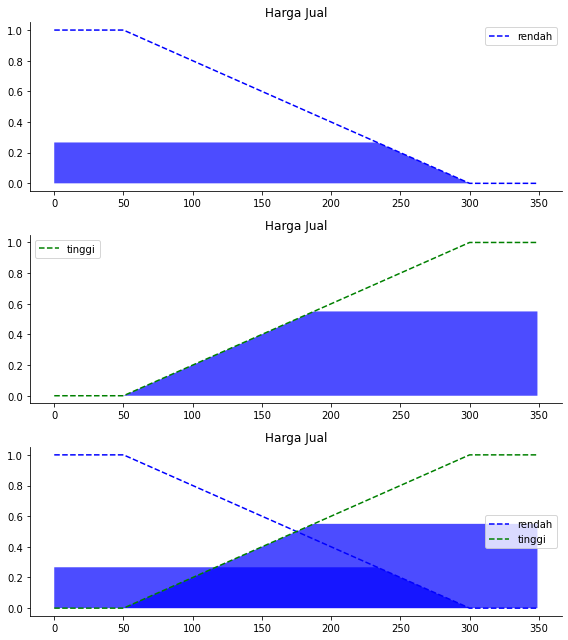

In [30]:
# Membandingkan grafik input dan output

Nilai_rendah = np.fmin(Nilai_rendah, Harga_rendah)
Nilai_tinggi = np.fmin(Nilai_tinggi, Harga_tinggi)

#Titik Awal Arsir
H0 = np.zeros_like(Harga)
Hr = np.zeros_like(Harga_rendah)
Ht = np.zeros_like(Harga_tinggi)

#Visualisasi
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8,9))

# Harga_rendah
ax0.fill_between(Harga, Hr, Nilai_rendah, facecolor='b', alpha=0.7)
ax0.plot(Harga, Harga_rendah, 'b', linewidth=1.5, linestyle='--', label='rendah')
ax0.set_title('Harga Jual')
ax0.legend()

ax1.fill_between(Harga, Ht, Nilai_tinggi, facecolor='b', alpha=0.7)
ax1.plot(Harga, Harga_tinggi, 'g', linewidth=1.5, linestyle='--', label='tinggi')
ax1.set_title('Harga Jual')
ax1.legend()

ax2.fill_between(Harga, Hr, Nilai_rendah, facecolor='b', alpha=0.7)
ax2.plot(Harga, Harga_rendah, 'b', linewidth=1.5, linestyle='--', label='rendah')
ax2.fill_between(Harga, Ht, Nilai_tinggi, facecolor='b', alpha=0.7)
ax2.plot(Harga, Harga_tinggi, 'g', linewidth=1.5, linestyle='--', label='tinggi')
ax2.set_title('Harga Jual')
ax2.legend()

#Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

In [31]:
#Komposisi Aturan
komposisi = np.fmax(Nilai_rendah, Nilai_tinggi)

#Hasil Defuzzifikasi
hj = fuzz.defuzz(Harga, komposisi, 'centroid')
print("Harga Jual = ", hj)

#Nilai Fuzzy Untuk Membership Function
hj_defuzzy = fuzz.interp_membership(Harga, komposisi, hj)
hj_defuzzy

Harga Jual =  202.6025212411092


0.55

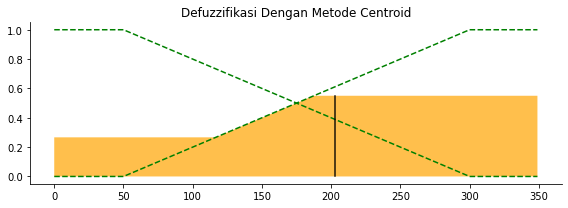

In [32]:
# Visualisasi Hasil
fig, ax0 = plt.subplots(figsize=(8,3))

ax0.plot(Harga, Harga_rendah, 'g', linewidth = 1.5, linestyle='--', label = 'Rendah')
ax0.plot(Harga, Harga_tinggi, 'g', linewidth = 1.5, linestyle='--', label = 'Rendah')
ax0.fill_between(Harga, H0, komposisi, facecolor = 'Orange', alpha = 0.7)
ax0.plot([hj, hj], [0, hj_defuzzy], 'k', linewidth = 1.5, alpha = 0.9)
ax0.set_title('Defuzzifikasi Dengan Metode Centroid')

#Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()